In [2]:
# use receptive field computation from Google research https://github.com/google-research/receptive_field
# to construct a CNN that has a minimum of 26x26 pixels receptive field
# see above link to install ffrom github

import receptive_field as rf
import tensorflow.compat.v1 as tf
from receptive_field.python.util import graph_compute_order
g = tf.Graph()
with g.as_default():
    model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(1, 1)), # dummy layer for receptive field to identify the last layer for computation.
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax",name="output"),
    ])
    #for i, layer in enumerate(model.layers):
    #   print(i, layer.name)

node_info, name_to_node = graph_compute_order.get_compute_order(
      graph_def=g.as_graph_def(),
      input_node_name='input_1',
      input_node_size=None)
#for node in node_info.items():
#     print(node[0])
        


# Compute receptive field parameters.
rf_x, rf_y, eff_stride_x, eff_stride_y, eff_pad_x, eff_pad_y = \
  rf.compute_receptive_field_from_graph_def( \
    g.as_graph_def(), 'input_1', 'max_pooling2d_2/MaxPool')
print(rf_x, rf_y, eff_stride_x, eff_stride_y, eff_pad_x, eff_pad_y)

26 26 4 4 0 0


In [1]:
"""
Title: Simple Fashion MNIST convnet
Create a convnet with the previously determined layers to cover 26x26 pixels

"""

"""
## Setup
"""
from numba import cuda 
device = cuda.get_current_device()
device.reset()
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X_train, Y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("X_train shape:", X_train.shape)
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape, "train samples")
print(x_test.shape, "test samples")


# convert class vectors to binary class matrices
print(Y_train.shape, "train labels")
print(y_test.shape, "test labels")
Y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(Y_train.shape, "train labels")
print(y_test.shape, "test labels")
"""
## Build the model
"""

model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_1.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 50

model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


X_train shape: (60000, 28, 28)
X_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(60000,) train labels
(10000,) test labels
(60000, 10) train labels
(10000, 10) test labels
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                

422/422 [==============================] - 8s 19ms/step - loss: 0.0859 - accuracy: 0.9660 - val_loss: 0.4201 - val_accuracy: 0.9128
Epoch 45/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0825 - accuracy: 0.9681 - val_loss: 0.4343 - val_accuracy: 0.9087
Epoch 46/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0850 - accuracy: 0.9669 - val_loss: 0.4091 - val_accuracy: 0.9118
Epoch 47/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0849 - accuracy: 0.9669 - val_loss: 0.4122 - val_accuracy: 0.9128
Epoch 48/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0805 - accuracy: 0.9684 - val_loss: 0.4161 - val_accuracy: 0.9112
Epoch 49/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0767 - accuracy: 0.9692 - val_loss: 0.4694 - val_accuracy: 0.9093
Epoch 50/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0762 - accuracy: 0.9699 - val_loss: 0.4544 - val_accuracy: 0.9067
Test

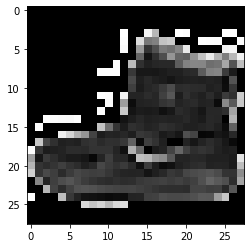

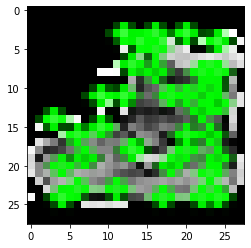

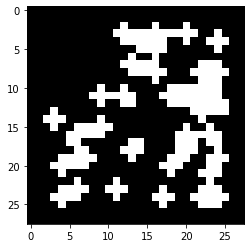

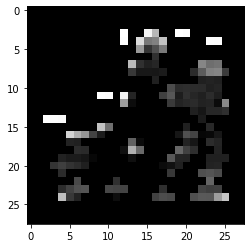

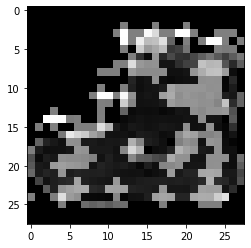

(<matplotlib.image.AxesImage at 0x2089c613880>, None)

In [4]:
# 
# test masking with ORB Keypoints on sample image
# 
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = (X_train[0,:,:]*255).astype(np.uint8)
#img = cv.cvtColor(img,cv.COLOR_GRAY2RGB)
# Initiate ORB detector
orb = cv.ORB_create(edgeThreshold=3, patchSize=2, nlevels=2, fastThreshold=7, scaleFactor=7,
                    WTA_K=4,scoreType=cv.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=64)
def get_ORB_all(orb,img):
    img = cv.equalizeHist(img)
    # find the keypoints with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp , des = orb.compute(img, kp)
    for k in kp:
        x = int(k.pt[0])
        y = int(k.pt[1])
        s = int(k.size)
        #print("x",x,"y",y,"size",s)
    # draw only keypoints location,not size and orientation
    img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=4)
    img3 = cv.drawKeypoints(img*0, kp, None, color=(255,255,255), flags=4)
    gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
    # Otsu's thresholding
    ret2,mask = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    return img2,img3,mask
    return mask
img2,img3,mask=get_ORB_all(orb,img)
plt.imshow(img, cmap='gray'), plt.show()
plt.imshow(img2), plt.show()
plt.imshow(mask, cmap='gray'), plt.show()
masked = cv.bitwise_and(img, img, mask=mask)
plt.imshow(masked, cmap='gray'), plt.show()
imgadd=(1.0*img+1.0*mask)
imgmax=np.amax(img)
addmax=np.amax(imgadd)
imgmask=((imgadd/addmax)*imgmax).astype(np.uint8)
plt.imshow(imgmask, cmap='gray'), plt.show()


In [1]:
#
# CNN to discriminante between Keypoints and no Keypoints areas
# 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import cv2 as cv
from numba import cuda 
device = cuda.get_current_device()
device.reset()

# define Keypoint masking method
def get_mask(img):
    orb = cv.ORB_create(edgeThreshold=3, patchSize=2, nlevels=2, fastThreshold=7, scaleFactor=7,
                    WTA_K=4,scoreType=cv.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=64)
    reduce=1
    imgm = reduce*(img//reduce)
    imgm = cv.equalizeHist(imgm)
    # find the keypoints with ORB
    kp = orb.detect(imgm,None)
    # compute the descriptors with ORB
    kp , des = orb.compute(imgm, kp)
    for k in kp:
        x = int(k.pt[0])
        y = int(k.pt[1])
        s = int(k.size)
        #print("x",x,"y",y,"size",s)
    # draw only keypoints location,not size and orientation
    img3 = cv.drawKeypoints(imgm*0, kp, None, color=(255,255,255), flags=4)
    gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
    # Otsu's thresholding
    ret2,mask = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    return mask
"""
## Prepare the data
"""

# Model / data parameters
num_classes = 2
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
# Scale images to the [0, 1] range
# create train set
print("create keypoint  train set")
(x,l,c)=X_train.shape
X_train_mask=  np.zeros((2*x,l,c)).astype("float32")
Y_train_mask=  np.zeros(2*x)
for i,img in enumerate(X_train):
    mask=get_mask(img).astype("float32")/255
    img=img.astype("float32")/255
    X_train_mask[2*i+1]=img*mask
    Y_train_mask[2*i+1]=0
    negativemask=1-mask
    X_train_mask[2*i]=img*negativemask
    Y_train_mask[2*i]=1
X_train_mask  = np.expand_dims(X_train_mask , -1)
print("create keypoint  test set") 
# create test set with each FashionMnist image first masked with keypoint zones 
# then another image using the negative mask
(x,l,c)=X_test.shape
X_test_mask=  np.zeros((2*x,l,c)).astype("float32")
Y_test_mask=  np.zeros(2*x)
for i,img in enumerate(X_test):
    mask=get_mask(img).astype("float32")/255
    img=img.astype("float32")/255
    X_test_mask[2*i+1]=img*mask
    Y_test_mask[2*i+1]=0
    negativemask=1-mask
    X_test_mask[2*i]=img*negativemask
    Y_test_mask[2*i]=1

X_test_mask  = np.expand_dims(X_test_mask , -1)
# convert class vectors to binary class matrices
Y_train_mask = keras.utils.to_categorical(Y_train_mask, num_classes)
Y_test_mask = keras.utils.to_categorical(Y_test_mask, num_classes)

"""
## Build the model to discriminate between keypoints and non keypoints
"""
print("Train Discriminator")
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3),strides=(1, 1), activation="relu"),
        layers.Dropout(0.5),        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model small number of Epochs as it converges quicklu
"""
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(X_train_mask.shape)
model.fit(X_train_mask , Y_train_mask, batch_size=batch_size, epochs=epochs, validation_split=0.3)
"""
## Evaluate the trained model
"""
print(X_test_mask.shape)
score = model.evaluate(X_test_mask , Y_test_mask, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

create keypoint  train set
create keypoint  test set
Train Discriminator
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 2)                 43266     
                                                                 
Total params: 43,586
Trainable params: 43,586
Non-trainable params: 0
_________________________________________________________________
(120000, 28, 28, 1)
Epoch 1/5
657/657 [==============================] - 14s 19ms/step - loss: 0.0270 - accurac

conv2d
conv2d
conv2d (3, 3, 1, 32)


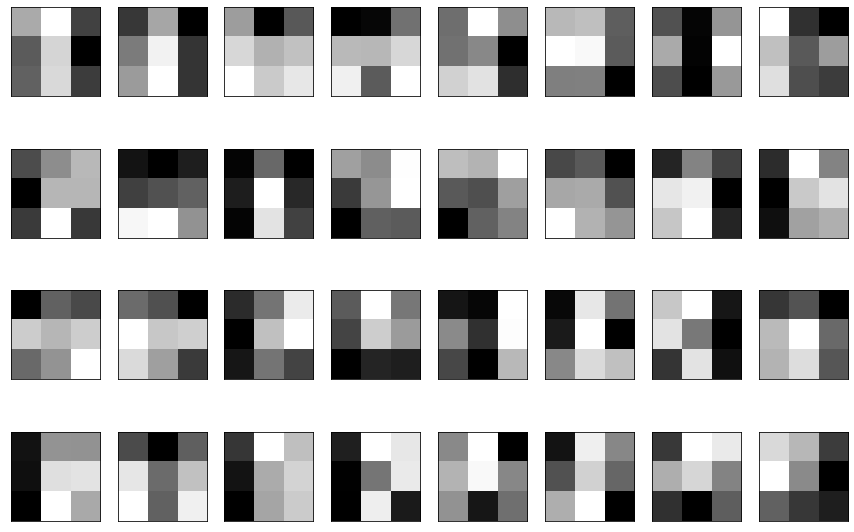

X_test_mask.shape (20000, 28, 28, 1)
img.shape (1, 28, 28, 1)
(1, 26, 26, 32)
0.9887488 0.0


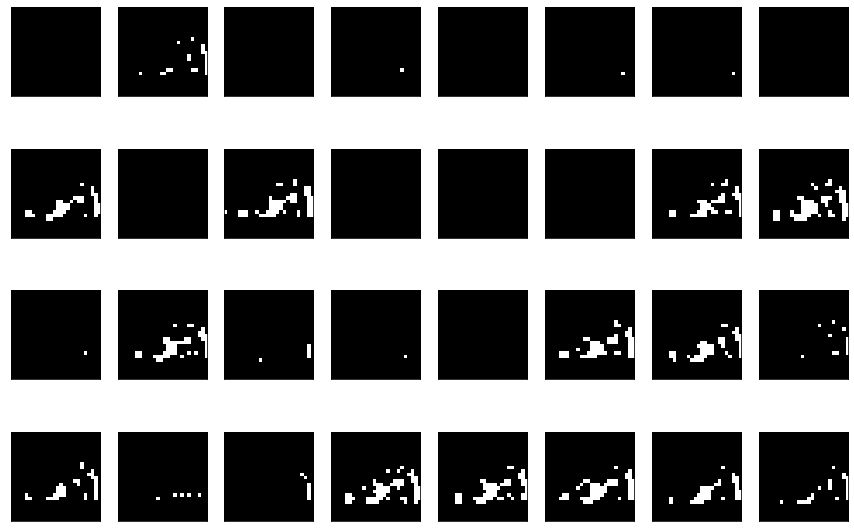

img.shape (1, 28, 28, 1)
(1, 26, 26, 32)
0.8218361 0.0


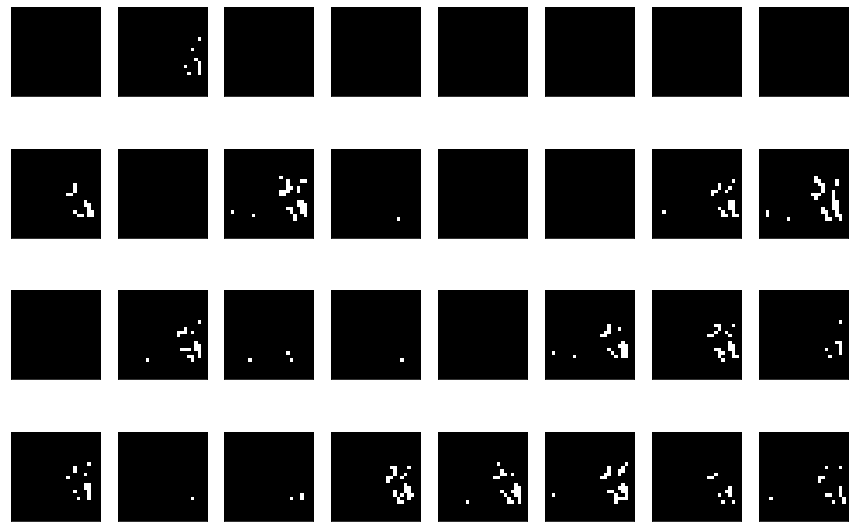

dropout
flatten
dense


In [4]:
# recover weights, display filters and one example of features
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
import pickle
pyplot.rcParams["figure.figsize"] = (15,10)
def plot_feature_maps(feature_maps,rows,cols):
    print(np.amax(feature_maps),np.amin(feature_maps))
    feature_maps=np.where(feature_maps>0.5,1,0)
    ix = 1
    for _ in range(rows):
        for _ in range(cols):
            # specify subplot and turn of axis
            ax = pyplot.subplot(rows, cols, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1
    pyplot.show() 
    
# recover weights and save them to pickle file
for layer in model.layers:
    print(layer.name)
    if layer.name=="conv2d":
        weights=layer.get_weights()
        filters, biases=weights
        pickle.dump( (filters, biases), open( "weights_save.p", "wb" ) )
        pyplot.show()
        rows=4
        cols=8
        # normalize filter values to 0-1 so we can visualize them
        f, axs = pyplot.subplots(rows, cols, sharey=True)
        n_filters, ix = filters.shape[-1], 0
        for i in range(n_filters):
            # get the filter
            f = filters[:, :, :, i]
            # specify subplot and turn of axis
            row=ix//cols
            col=ix-cols*row
            ax=axs[row,col]
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            ax.imshow(f[:, :, 0], cmap='gray')
            ix += 1
        # show the figure
        pyplot.show()
        # load the image with the required shape
        print("X_test_mask.shape",X_test_mask.shape)
        img = X_test_mask[0,:,:,:]
        # expand dimensions so that it represents a single 'sample'
        img = np.expand_dims(img, axis=0)
        print("img.shape",img.shape)
        # get feature map for first hidden layer
        # redefine model to output right after the first hidden layer
        model_ = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)
        feature_maps = model_(img)
        print(feature_maps.shape)
        # plot all 32 maps 
        
        plot_feature_maps(feature_maps,rows,cols)
        
        # second one
        img = X_test_mask[1,:,:,:]
        # expand dimensions so that it represents a single 'sample'
        img = np.expand_dims(img, axis=0)
        print("img.shape",img.shape)
        # get feature map for first hidden layer
        # redefine model to output right after the first hidden layer
        feature_maps = model_(img)
        print(feature_maps.shape)
        plot_feature_maps(feature_maps,rows,cols)
        pyplot.show()

In [2]:
"""
Now transfer learned keypoint discriminator layer to FashionMnist categorization CNN
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import pickle

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X_train, Y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("X_train shape:", X_train.shape)
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape, "train samples")
print(x_test.shape, "test samples")


# convert class vectors to binary class matrices
print(Y_train.shape, "train labels")
print(y_test.shape, "test labels")
Y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(Y_train.shape, "train labels")
print(y_test.shape, "test labels")

"""
## Build the model
"""

model_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


"""
## Transfer the weights
"""
for layer in model_2.layers:
    print(layer.name)
    if layer.name=="conv2d":
        weights=pickle.load( open( "weights_save.p", "rb" ) )
        layer.set_weights(weights)
        #layer.trainable = False  


model_2.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 50

model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


X_train shape: (60000, 28, 28)
X_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(60000,) train labels
(10000,) test labels
(60000, 10) train labels
(10000, 10) test labels
conv2d_4
max_pooling2d_2
conv2d_5
max_pooling2d_3
conv2d_6
conv2d_7
flatten_1
dropout_1
dense_1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         


422/422 [==============================] - 8s 19ms/step - loss: 0.0898 - accuracy: 0.9657 - val_loss: 0.3607 - val_accuracy: 0.9150
Epoch 44/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0875 - accuracy: 0.9660 - val_loss: 0.3746 - val_accuracy: 0.9100
Epoch 45/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0860 - accuracy: 0.9664 - val_loss: 0.4014 - val_accuracy: 0.9163
Epoch 46/50
422/422 [==============================] - 8s 18ms/step - loss: 0.0826 - accuracy: 0.9677 - val_loss: 0.3988 - val_accuracy: 0.9170
Epoch 47/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0776 - accuracy: 0.9691 - val_loss: 0.3804 - val_accuracy: 0.9147
Epoch 48/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0810 - accuracy: 0.9680 - val_loss: 0.4250 - val_accuracy: 0.9165
Epoch 49/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0817 - accuracy: 0.9674 - val_loss: 0.4302 - val_accuracy: 0.9158
Epoc

In [3]:
"""
Test Freezing keypoint layer  
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import pickle
"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X_train, Y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("X_train shape:", X_train.shape)
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape, "train samples")
print(x_test.shape, "test samples")


# convert class vectors to binary class matrices
print(Y_train.shape, "train labels")
print(y_test.shape, "test labels")
Y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(Y_train.shape, "train labels")
print(y_test.shape, "test labels")
"""
## Build the model
"""

model_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

"""
## Transfer the weights freeze learning
"""
for layer in model_3.layers:
    print(layer.name)
    if layer.name=="conv2d":
        weights=pickle.load( open( "weights_save.p", "rb" ) )
        layer.set_weights(weights)
        layer.trainable = False  


model_3.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 50

model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model_3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


X_train shape: (60000, 28, 28)
X_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(60000,) train labels
(10000,) test labels
(60000, 10) train labels
(10000, 10) test labels
conv2d_8
max_pooling2d_4
conv2d_9
max_pooling2d_5
conv2d_10
conv2d_11
flatten_2
dropout_2
dense_2
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0        

422/422 [==============================] - 8s 20ms/step - loss: 0.0837 - accuracy: 0.9670 - val_loss: 0.4234 - val_accuracy: 0.9083
Epoch 44/50
422/422 [==============================] - 8s 20ms/step - loss: 0.0824 - accuracy: 0.9675 - val_loss: 0.4059 - val_accuracy: 0.9128
Epoch 45/50
422/422 [==============================] - 9s 20ms/step - loss: 0.0800 - accuracy: 0.9686 - val_loss: 0.4351 - val_accuracy: 0.9107
Epoch 46/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0788 - accuracy: 0.9692 - val_loss: 0.4247 - val_accuracy: 0.9120
Epoch 47/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0789 - accuracy: 0.9695 - val_loss: 0.4440 - val_accuracy: 0.9130
Epoch 48/50
422/422 [==============================] - 8s 19ms/step - loss: 0.0756 - accuracy: 0.9701 - val_loss: 0.4533 - val_accuracy: 0.9097
Epoch 49/50
422/422 [==============================] - 8s 20ms/step - loss: 0.0739 - accuracy: 0.9707 - val_loss: 0.4507 - val_accuracy: 0.9100
Epoc